<a href="https://colab.research.google.com/github/hardik-vala/misc/blob/main/ergodicity_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
LEVERAGE = 1.0
WIN_PROP = 0.5
LOSS_PROP = 0.4
START_SUM = 100.0

In [64]:
def flip():
  return True if random.random() < 0.5 else False

def next_sum(curr_sum):
  return curr_sum * LEVERAGE * (1 + WIN_PROP) if flip() else curr_sum * LEVERAGE * (1 - LOSS_PROP)

def generate_outcomes(num_seq, num_time_steps):
  outcome_lists = []
  for _ in range(num_seq):
    outcomes_individual = [START_SUM]
    for _ in range(num_time_steps):
      outcomes_individual.append(next_sum(outcomes_individual[-1]))
    outcome_lists.append(outcomes_individual)

  return torch.tensor(outcome_lists)

In [65]:
outcomes = generate_outcomes(20, 1000)
ensemble_outcomes = outcomes.mean(dim=0)

Text(0, 0.5, 'Average amount ($)')

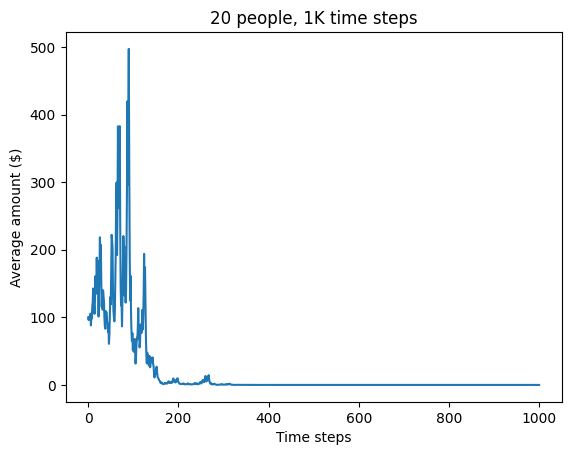

In [66]:
plt.plot(ensemble_outcomes)
plt.title("20 people, 1K time steps")
plt.xlabel("Time steps")
plt.ylabel("Average amount ($)")

In [67]:
# plt.plot(outcomes);

Text(0, 0.5, '# people')

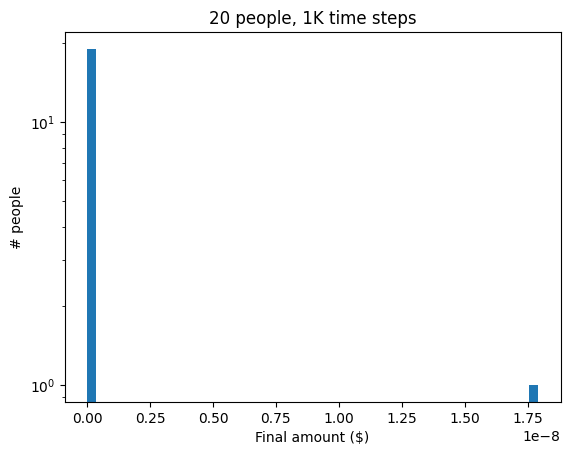

In [68]:
plt.hist(outcomes[:, -1].tolist(), bins=50);
plt.title("20 people, 1K time steps")
plt.yscale("log")
plt.xlabel("Final amount ($)")
plt.ylabel("# people")

In [69]:
outcomes = generate_outcomes(1000000, 20)
ensemble_outcomes = outcomes.mean(dim=0)

Text(0, 0.5, 'Average amount ($)')

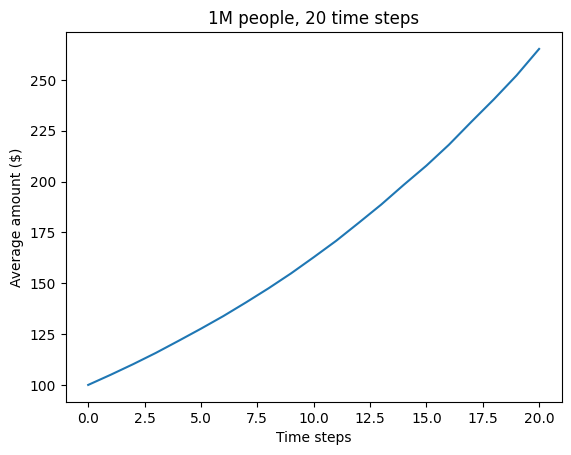

In [70]:
plt.plot(ensemble_outcomes)
plt.title("1M people, 20 time steps")
plt.xlabel("Time steps")
plt.ylabel("Average amount ($)")

Text(0, 0.5, '# people')

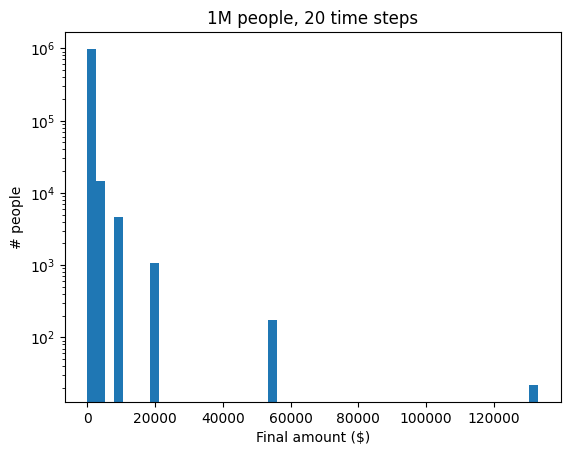

In [71]:
plt.hist(outcomes[:, -1].tolist(), bins=50);
plt.title("1M people, 20 time steps")
plt.yscale("log")
plt.xlabel("Final amount ($)")
plt.ylabel("# people")

This fun escapade was inspired by this talk by Dr Ole Peters: [Time for a Change: Introducing irreversible time in economics](https://www.youtube.com/watch?v=f1vXAHGIpfc)